In [59]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report


In [22]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


In [24]:
# convert the y_train into 1D array
y_train = y_train.reshape(-1,)

In [26]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [50]:
def plot_sample(X, y, index):
    plt.figure(figsize = (3,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


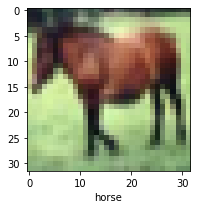

In [51]:
plot_sample(X_train, y_train, 7)

In [52]:
##Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255
X_train = X_train / 255.0
X_test = X_test / 255.0

In [56]:
#//BUILDING ARTIFICIAL NEURAL NETWORK FOR IMAGE CLASSIFICATION

Ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

Ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 88s 54ms/step - loss: 1.8159 - accuracy: 0.3545
Epoch 2/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.6265 - accuracy: 0.4271
Epoch 3/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.5424 - accuracy: 0.4542
Epoch 4/5
1563/1563 [==============================] - 82s 53ms/step - loss: 1.4830 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.4312 - accuracy: 0.4961


In [ ]:
## Accuracy with ANN model is nearly 49%


In [61]:
y_pred = Ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.39      0.66      0.49      1000
           1       0.57      0.62      0.59      1000
           2       0.47      0.14      0.21      1000
           3       0.37      0.34      0.35      1000
           4       0.39      0.52      0.44      1000
           5       0.51      0.23      0.32      1000
           6       0.61      0.40      0.48      1000
           7       0.57      0.48      0.52      1000
           8       0.59      0.63      0.61      1000
           9       0.42      0.68      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



In [169]:
y_pred_classes[30:35]

[6, 4, 0, 3, 9]

In [170]:
y_test[30:35]

array([6, 5, 4, 5, 9], dtype=uint8)

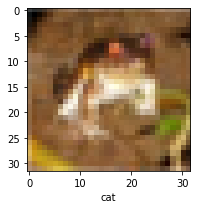

In [182]:
plot_sample(X_train, y_test, 0)

In [ ]:
##CNN model for the image classification


In [62]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

In [65]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# cnn.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [66]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 45s 28ms/step - loss: 1.5253 - accuracy: 0.4472
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1578 - accuracy: 0.5931
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0214 - accuracy: 0.6444
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9407 - accuracy: 0.6740
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8791 - accuracy: 0.6960
Epoch 6/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8342 - accuracy: 0.7103
Epoch 7/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.7927 - accuracy: 0.7249
Epoch 8/10
1563/1563 [==============================] - 48s 30ms/step - loss: 0.7580 - accuracy: 0.7367
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7231 - accuracy: 0.7479
Epoch 10/10
1563/1563 [==============================] - 44s 28m

In [67]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.9223 - accuracy: 0.6937


[0.9222888946533203, 0.6937000155448914]

In [142]:
y_predcnn = cnn.predict(X_test)

In [153]:
y_classes = [np.argmax(element) for element in y_predcnn]
y_classes[30:35]

[6, 5, 2, 5, 9]

In [163]:
y_test[30:35]

array([6, 5, 4, 5, 9], dtype=uint8)

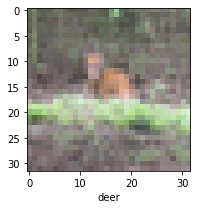

In [181]:
plot_sample(X_test, y_test,32)

In [183]:
y_predcnn = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_predcnn]

print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      1000
           1       0.80      0.83      0.81      1000
           2       0.58      0.58      0.58      1000
           3       0.48      0.55      0.51      1000
           4       0.70      0.52      0.60      1000
           5       0.61      0.58      0.60      1000
           6       0.73      0.81      0.77      1000
           7       0.75      0.74      0.75      1000
           8       0.84      0.79      0.81      1000
           9       0.77      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

